In [1]:
# add relative path to sys.path

sys.path.append("/Users/haas/Documents/Masters/GANQS/src/")

In [2]:
from ffnn import FFNN
from numpy.random import default_rng
from jax import grad
import matplotlib.pyplot as plt
import jax.numpy as jnp

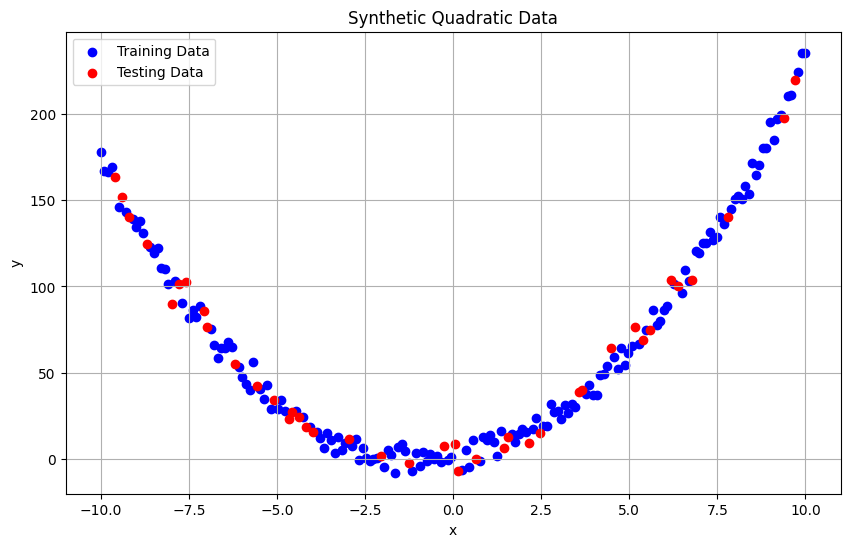

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the quadratic function y = ax^2 + bx + c
a, b, c = 2, 3, -1

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-10, 10, 200)  # 200 data points in the range [-10, 10]
y = a * x**2 + b * x + c + np.random.normal(0, 5, x.shape)  # Add Gaussian noise

# Split the data into training and testing sets
train_ratio = 0.8
idx = np.arange(len(x))
np.random.shuffle(idx)

split = int(len(x) * train_ratio)
train_idx, test_idx = idx[:split], idx[split:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue')
plt.scatter(x_test, y_test, label='Testing Data', color='red')
plt.title('Synthetic Quadratic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
class FFNNRegression(FFNN):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Modify the last layer to have only one neuron for regression output
        self._layer_sizes[-1] = 1
        self._initialize_layers(self.rng)

    def forward(self, x, params):
        # Overriding forward method for regression (single output neuron)
        x = super().forward(x, params)
        # In regression, the output layer usually doesn't have an activation function
        return x

In [11]:
# Function to compute Mean Squared Error
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Training loop
def train_network(network, x_train, y_train, learning_rate, epochs):
    params = network.params

    # Function to update parameters using gradient descent
    def update(params, x, y):
        y_pred = network.forward(jnp.array(x).reshape(-1, 1), params).reshape(-1)
        loss = mse_loss(jnp.array(y), y_pred)
        gradients = grad(loss)(params)
        new_params = jax.tree_multimap(lambda p, g: p - learning_rate * g, params, gradients)
        return new_params, loss

    for epoch in range(epochs):
        params, loss = update(params, x_train, y_train)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return params

In [13]:
# Initialize FFNN for regression
nparticles, dim = 1, 1  
layer_sizes = [1, 10, 1]  # Example architecture
activations = ['relu', 'relu', 'linear']  # No activation for the output layer
regression_nn = FFNNRegression(nparticles, dim, layer_sizes, activations, rng=default_rng(42))

# Train the network
learning_rate = 0.01
epochs = 1000
trained_params = train_network(regression_nn, x_train, y_train, learning_rate, epochs)

# Predict using the trained network
y_pred_train = regression_nn.forward(jnp.array(x_train).reshape(-1, 1), trained_params).reshape(-1)
y_pred_test = regression_nn.forward(jnp.array(x_test).reshape(-1, 1), trained_params).reshape(-1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue')
plt.scatter(x_test, y_test, label='Testing Data', color='red')
plt.plot(x_train, y_pred_train, label='NN Prediction (Train)', color='green')
plt.plot(x_test, y_pred_test, label='NN Prediction (Test)', color='orange')
plt.title('Neural Network Regression Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


TypeError: dot_general requires contracting dimensions to have the same shape, got (200,) and (160,).

In [18]:
net